**Tugas 2 - Classification**<br>
Anggota Kelompok: <br>

* Muhammad Helmy Faishal (1301190400)
* Muchammad Alfi Karom	(1301190363)

In [ ]:
# Untuk mengabaikan warning
import warnings
warnings.filterwarnings("ignore")

# **Formulasi Masalah**

Pada tugas 2 mata kuliah Pembelajaran Mesin ini kami akan melakukan classification pada dataset yang telah disediakan yang berisi [data train](https://github.com/helmy-faishal/tugas-classification/blob/main/kendaraan_train.csv?raw=true) dan [data test](https://github.com/helmy-faishal/tugas-classification/blob/main/kendaraan_test.csv?raw=true)

# **Ekspolarasi dan Persiapan Data**

## **Load Dataset**

In [ ]:
import pandas as pd

**Data Train**

In [ ]:
df_train = pd.read_csv("https://github.com/helmy-faishal/tugas-classification/blob/main/kendaraan_train.csv?raw=true")
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


**Data Test**

In [ ]:
df_test = pd.read_csv("https://github.com/helmy-faishal/tugas-classification/blob/main/kendaraan_test.csv?raw=true")
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


## **Data Pre-Processing**

### **Handling Missing Value**

Untuk menangani data yang kosong/hilang, disini kita akan mengambil nilai terbanyak/most frequent dari data dengan menggunakan bantuan SimpleImputer dari sklearn

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np



def handling_missing(df,columns):
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    
    df[columns] = imputer.fit_transform(df[columns])
    
    return df

**Data Train**

In [ ]:
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Pada data train terlihat bahwa masih terdapat nilai yang kosong/hilang sehingga kita perlu menangani data tersebut terlebih dahulu

In [ ]:
columns = df_train.drop(columns=["id","Tertarik"]).columns
df_train = handling_missing(df_train,columns)

In [ ]:
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

**Data Test**

In [ ]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Pada data test terlihat bahwa tidak ada data yang hilang/kosong sehingga kita dapat melanjutkan ke tahap berikutnya

### **Change Categorical to Numeric**

Untuk mengubah data kategorikal menjadi numerik, disini kita akan menggunakan bantuan LabelEncoder dari sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder

def change_to_numeric(df,columns):
    encode = LabelEncoder()
    for col in columns:
        df[col] = encode.fit_transform(df[col])
    return df

**Data Train**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      285831 non-null  object 
 2   Umur               285831 non-null  float64
 3   SIM                285831 non-null  float64
 4   Kode_Daerah        285831 non-null  float64
 5   Sudah_Asuransi     285831 non-null  float64
 6   Umur_Kendaraan     285831 non-null  object 
 7   Kendaraan_Rusak    285831 non-null  object 
 8   Premi              285831 non-null  float64
 9   Kanal_Penjualan    285831 non-null  float64
 10  Lama_Berlangganan  285831 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Dari data train diatas terlihat masih ada data yang bertipe object sehingga kita perlu mengubah data tersebut menjadi data numerik 

In [ ]:
columns = ["Jenis_Kelamin","Umur_Kendaraan","Kendaraan_Rusak"]
df_train = change_to_numeric(df_train,columns)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      285831 non-null  int64  
 2   Umur               285831 non-null  float64
 3   SIM                285831 non-null  float64
 4   Kode_Daerah        285831 non-null  float64
 5   Sudah_Asuransi     285831 non-null  float64
 6   Umur_Kendaraan     285831 non-null  int64  
 7   Kendaraan_Rusak    285831 non-null  int64  
 8   Premi              285831 non-null  float64
 9   Kanal_Penjualan    285831 non-null  float64
 10  Lama_Berlangganan  285831 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 26.2 MB


**Data Test**

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


Dari data test diatas terlihat masih ada data yang bertipe object sehingga kita perlu mengubah data tersebut menjadi data numerik 

In [ ]:
columns = ["Jenis_Kelamin","Umur_Kendaraan","Kendaraan_Rusak"]
df_test = change_to_numeric(df_test,columns)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 non-null  int64
 1   Umur               47639 non-null  int64
 2   SIM                47639 non-null  int64
 3   Kode_Daerah        47639 non-null  int64
 4   Sudah_Asuransi     47639 non-null  int64
 5   Umur_Kendaraan     47639 non-null  int64
 6   Kendaraan_Rusak    47639 non-null  int64
 7   Premi              47639 non-null  int64
 8   Kanal_Penjualan    47639 non-null  int64
 9   Lama_Berlangganan  47639 non-null  int64
 10  Tertarik           47639 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB


### **Handling Outliers Data**

Untuk menangani data outlier, disini kita akan menghapus data outlier tersebut, lalu untuk mendapatkan data outlier kita akan menggunakan Interquartile Range(IQR)

In [ ]:
def remove_outliers(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
    
        IQR = Q3 - Q1
    
        UPPER = Q3 + 1.5*IQR
        LOWER = Q1 - 1.5*IQR

        df = df[(df[col] >= LOWER) & (df[col] <= UPPER)]
    
    return df

**Data Train**

In [ ]:
df_train.describe()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,142916.000000,0.436317,38.106147,0.997957,26.485220,0.435939,0.490542,0.470628,29114.260881,114.021530,154.468095,0.122471
std,82512.446734,0.495929,15.471865,0.045155,12.921482,0.495880,0.574280,0.499137,17803.527017,53.543345,81.624617,0.327830
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,0.000000,24.000000,1.000000,15.000000,0.000000,0.000000,0.000000,22311.000000,55.000000,85.000000,0.000000
50%,142916.000000,0.000000,34.000000,1.000000,28.000000,0.000000,0.000000,0.000000,30949.000000,152.000000,158.000000,0.000000
75%,214373.500000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,38845.000000,152.000000,223.000000,0.000000
max,285831.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Dari data diatas, terlihat bahwa data max pada kolom "Premi" selisihnya sangat jauh dibanding dengan data 75% atau Q3 sehingga kemungkinan terdapat data outlier pada kolom "Premi".
<br>
Untuk melihat apakah ada data outlier, kita akan menggunakan boxplot

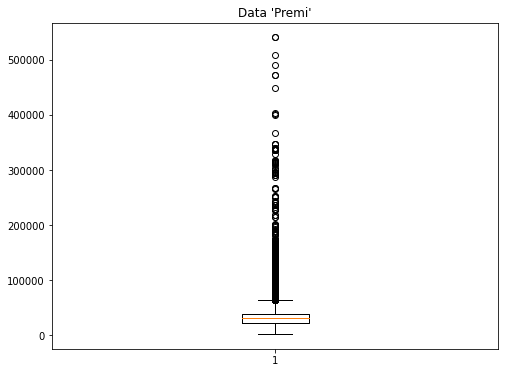

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.boxplot(df_train["Premi"])
plt.title("Data 'Premi'")

plt.show()

Seperti yang terlihat dari plot diatas, pada data "Premi" memang terdapat data oulier sehingga kita perlu menangani data tersebut dengan cara menghapus data outlier tersebut

In [ ]:
columns = ["Premi"]
df_train = remove_outliers(df_train,columns)

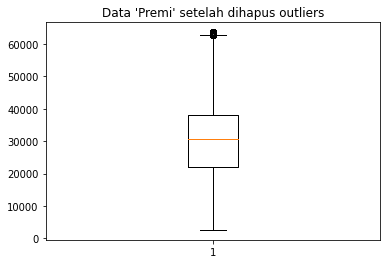

In [ ]:
plt.boxplot(df_train["Premi"])
plt.title("Data 'Premi' setelah dihapus outliers")

plt.show()

### **Save Data Train and Data Test After Data Pre-processing**

**Data Train**

In [ ]:
df_train.to_csv("kendaraan_train_preprocessing.csv",index=False)

**Data Test**

In [ ]:
df_test.to_csv("kendaraan_test_preprocessing.csv",index=False)

## **Handling Imbalance Data**

**Data Train**

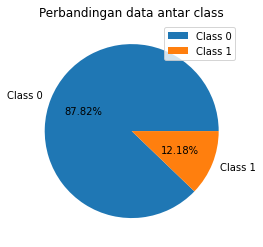

In [ ]:
class0 = df_train[df_train["Tertarik"]==0]
class1 = df_train[df_train["Tertarik"]==1]

count_class0 = class0.shape[0]
count_class1 = class1.shape[0]

x = [count_class0, count_class1]
plt.pie(x, labels=["Class 0","Class 1"], autopct="%.2f%%")
plt.title("Perbandingan data antar class")
plt.legend()
plt.show()

Dari plot diatas, terlihat bahwa data class 0 dan class 1 tidak seimbang dimana data class 0 sebesar 87.82% dan data class 1 sebesar 12.18%. <br>
Oleh karena itu, kita perlu menangani data yang tidak seimbang tersebut, disini kita akan menangani menggunakan Random Oversampling atau Random Undersampling

![random sampling](https://miro.medium.com/max/906/0*u6pKLqdCDsG_5kXa.png)
<br>
[Sumber Foto](https://www.kdnuggets.com/2019/09/5-sampling-algorithms.html)

**Random Undersampling** adalah memilih data sample secara acak pada data mayoritas sebanyak data minoritas. <br>
**Random Oversampling** adalah memilih data sample secara acak pada data minoritas sebanyak data mayoritas. <br>

Karena metode Random Undersampling akan menghilangkan atau menghapus sebagian data, maka kita akan mengecek terlebih dahulu seberapa besar kita akan kehilangan data setelah melakukan Random Undersampling

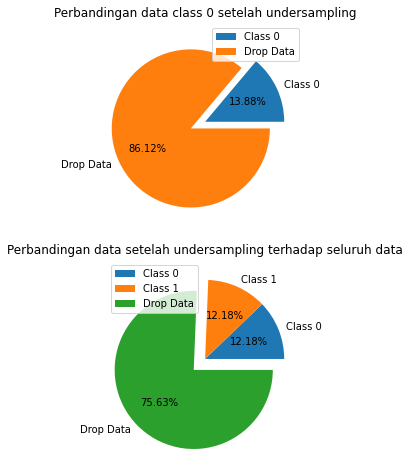

In [ ]:
class0_under = count_class1

plt.figure(figsize=(10,8))

y1 = [class0_under ,(count_class0 - count_class1)]
plt.subplot(2,1,1)
plt.pie(y1, labels=["Class 0","Drop Data"],explode=[0,0.2], autopct="%.2f%%")
plt.title("Perbandingan data class 0 setelah undersampling")
plt.legend()

y2 = [class0_under, count_class1, (count_class0 - count_class1)]
plt.subplot(2,1,2)
plt.pie(y2, labels=["Class 0","Class 1","Drop Data"], explode=[0,0,0.2],autopct="%.2f%%")
plt.title("Perbandingan data setelah undersampling terhadap seluruh data")
plt.legend()

plt.show()

Dari plot diatas, jika kita melakukan undersampling, maka kita akan kehilangan data class 0 sebesar 86.12% atau sebesar 75.63% dari seluruh data

Karena kita akan kehilangan data class 0 yang besar, maka kita akan menggunakan Random Oversampling untuk menangani data yang tidak seimbang

In [ ]:
class0 = df_train[df_train["Tertarik"]==0]
class1 = df_train[df_train["Tertarik"]==1]

count_class0 = class0.shape[0]
count_class1 = class1.shape[0]

class1_over = class1.sample(n=count_class0, replace=True)

df_train = pd.concat([class1_over,class0], ignore_index=True)

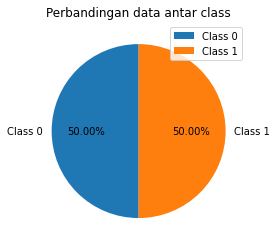

In [ ]:
x = df_train["Tertarik"].value_counts().values
label = ["Class 0","Class 1"]
plt.pie(x, labels=label, autopct="%.2f%%",startangle=90)
plt.title("Perbandingan data antar class")
plt.legend()
plt.show()

## **Split Data Train**

Karena kita telah memiliki data test, maka kita hanya akan membagi data train menjadi data train sebesar 80% dan data validation sebesar 20%

In [ ]:
state = 42
df_validation = df_train.sample(frac=0.2,random_state=state)
df_train = df_train.drop(df_validation.index)

In [ ]:
print(f"Validation = {df_validation.shape}")
print(f"Data Train = {df_train.shape}")

Validation = (98208, 12)
Data Train = (392834, 12)


# **Pemodelan**

Untuk tugas classification kali ini, kita akan menggunakan model Decision Tree

## **Decision Tree**

In [ ]:
# Fungsi check_purity digunakan untuk menentukan
# apakah data sudah pure atau belum

def check_purity(label):
    unique = np.unique(label)
    if len(unique) == 1:
        return True
    else:
        return False

In [ ]:
# Fungsi classify_data digunakan untuk melakukan
# klasifikasi pada data, jika label memiliki
# lebih dari 1 nilai maka akan diambil yang
# terbanyak atau mayoritas

def classify_data(data):
    label = data[:,-1]
    class_label,count = np.unique(label,return_counts=True)
    index_majority = np.argmax(count)
    
    classify = class_label[index_majority]
    return classify

Rumus Entropy<br>
![Rumus Entropy](https://github.com/helmy-faishal/tugas-classification/blob/main/Gambar_Pendukung/entropy.png?raw=true) <br>
* c   : jumlah nilai yang ada pada atribut target (jumlah kelas klasifikasi). <br>
* pi  : porsi sampel untuk kelas i.


In [ ]:
# Fungsi entropy digunakan untuk
# Menghitung nilai entropy data

def entropy(data):  
    if data.ndim == 1:
        target = data
    else:
        target = data[:,-1]
    _,counts = np.unique(target,return_counts=True)
    
    probabilities = counts/np.sum(counts)
    
    entropy_value = 0
    for p in probabilities:
        if p>0:
            entropy_value += p*np.log2(p)
    
    return -entropy_value

Rumus Information Gain<br>
![Rumus information gain](https://github.com/helmy-faishal/tugas-classification/blob/main/Gambar_Pendukung/information_gain.png?raw=true) <br>
* A : atribut <br>
* V : menyatakan suatu nilai yang mungkin untuk atribut A <br>
* Values(A) : himpunan nilai-nilai yang mungkin untuk atribut A <br>
* |Sv| : jumlah sampel untuk nilai v <br>
* |S| : jumlah seluruh sampel data <br>
* Entropy(Sv) : entropy untuk sampel-sampel yang memiliki nilai v <br>

In [ ]:
# Fungsi information_gain digunakan untuk menghitung
# nilai information gain dari kolom/fitur data atau
# information gain dari data dan sub_data

def information_gain(data,*sub_data,column_index=None):
    entropy_data = entropy(data)
    
    if len(sub_data)>0:
        entropy_sub_data = 0
        for sub in sub_data:
            p_sub = len(sub)/len(data)
            entropy_sub_data += p_sub*entropy(sub)
    else:
        selected_feature = data[:,column_index]
        unique_value = np.unique(selected_feature)
        entropy_sub_data = 0
        for value in unique_value:
            attr = data[selected_feature==value]
            entropy_attr = len(attr)/len(selected_feature)*entropy(attr)
            entropy_sub_data += entropy_attr
    
    information_gain = entropy_data - entropy_sub_data
    return information_gain

In [ ]:
# Fungsi get_best_split digunakan untuk mendapatkan
# kolom/fitur serta nilai yang terbaik untuk 
# melakukan split data

def get_best_split(data):
    best_feature = None
    split_value = None

    # Disini akan menentukan fitur/kolom mana dengan
    # nilai information gain terbaik
    best_info_gain = -1
    for col_index in range(data.shape[1]-1):

        # jika kolom sudah pernah terpilih maka tidak akan
        # ikut dihitung information gain-nya
        if np.all(data[:,col_index] == np.inf):
            continue
        
        # menghitung dan menentukan kolom dengan information gain terbaik
        info_gain = information_gain(data,column_index=col_index)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = col_index
    # jika information gain-nya <=0 maka akan dikembalikan
    # nilai None,None yang menandakan bahwa tidak ada
    # kolom/fitur serta nilai split dengan information gain terbaik
    if best_info_gain <= 0:
        return None,None
    
    # menentukan nilai split terbaik pada kolom/fitur 
    # yang terpilih menggunakan information gain
    feature = data[:,best_feature]
    best_info_gain = -1
    # melakukan pengecekan setiap nilai unik pada fitur terpilih
    for value in np.unique(feature):
        # memisahkan data berdasarkan nilai split
        # left untuk data dengan nilai pada fitur <= nilai 
        # left untuk data dengan nilai pada fitur <= nilai 
        left = data[feature <= value]
        right = data[feature > value]

        # mengecek apakah data left atau right tidak 0
        # karena jika berjumlah 0 maka seperti tidak membagi data
        if len(left)>0 and len(right)>0:
            # menghitung dan menentukan nilai split dengan
            # information gain yang terbaik
            info_gain = information_gain(data,left,right)
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                split_value = value
            
    # mengembalikan kolom/fitur terbaik dan nilai split terbaik
    return best_feature,split_value

In [ ]:
def grow_tree(data,depth,max_depth,min_samples):
    # Menentukan apakah ada kondisi yang terpenuhi atau tidak
    # Jika ada akan menghentikan pengembangan decision tree
    # lalu mengembalikan klasifikasi data
    if (check_purity(data) or depth>max_depth or len(data)<min_samples):
        return classify_data(data)
    
    # Mendapatkan fitur terbaik dan nilai split terbaik
    best_feat,split_value = get_best_split(data)

    # Jika tidak ada fitur terbaik atau nilai split terbaik
    # maka akan mengembalikan klasifikasi data
    if best_feat==None or split_value==None:
        return classify_data(data)

    # membuat node
    rules = f"feature-{best_feat} <= {split_value}"
    node = {rules:[]}
    
    # menyimpan fitur terpilh
    selected_feature = data[:,best_feat]
    # memisahkan data berdasarkan fitur terpilih
    # serta nilai split yang telah ditentukan
    data_left = data[selected_feature<=split_value]
    data_right = data[selected_feature>split_value]
    
    # mengecek apakah jumlah data left atau right adalah 0
    # karena jika berjumlah 0 maka seperti tidak membagi data
    # jika ternyata jumlahnya adalah 0 maka akan langsung
    # mengembalikan klasifikasi data
    if len(data_left) == 0 or len(data_right) == 0:
        return classify_data(data)

    # memberi tanda pada fitur terpilih agar tidak terpilih kembali
    data_left[:,best_feat] = np.inf
    data_right[:,best_feat] = np.inf

    # mengembangkan cabang kiri dan kanan pada decision tree
    depth += 1
    node_left = grow_tree(data_left,depth,max_depth,min_samples)
    node_right = grow_tree(data_right,depth,max_depth,min_samples)

    # jika ternyata cabang kiri dan kanan sama
    # maka akan mengembalikan salah satu cabang
    if node_left==node_right:
        return node_left
    
    # memasukkan cabang ke dalam node
    node[rules].append(node_left)
    node[rules].append(node_right)
    
    # mengembalikan node
    return node

In [ ]:
def decision_tree(train,label,max_depth=None,min_samples=None):
    # mengubah data train dan label menjadi array
    train = np.array(train)
    label = np.array(label)

    # mengecek apakah parameter max_depth adalah default
    if max_depth == None:
        max_depth = float("inf")

    # mengecek apakah parameter min_samples adalah float
    if isinstance(min_samples,float):
        if min_samples > 1:
            min_samples = int(min_samples)
        else:
            min_samples = round(len(train)*min_samples)
    
    # mengecek apakah parameter min_samples adalah integer
    if isinstance(min_samples,int):
        if min_samples > len(train):
            raise ValueError("Error: jumlah min_samples > jumlah data train")
        min_samples = min_samples

    # mengecek apakah parameter min_samples adalah default
    if min_samples == None:
        min_samples = len(np.unique(label))+1
    
    # mengecek apakah hanya ada 1 fitur pada data train atau
    # data train merupakan array 1 dimensi
    if train.ndim == 1:
        train = train.reshape(-1,1)
    
    # menggabungkan data train dengan data label
    # untuk mempermudah perhitungan
    data = np.concatenate((train,label.reshape(-1,1)),axis=1)
    
    # mengembangkan cabang pada decision tree
    depth = 0
    tree = grow_tree(data,depth,max_depth,min_samples)
    return tree

In [ ]:
def classify_node(node,data):
    # mengecek apakah node masih memiliki cabang
    if isinstance(node,dict):
        rules = list(node.keys())[0]
        column_name,operator,value = rules.split(" ")
        _,column = column_name.split("-")
        data_value = data[:,int(column)][0]
        # melakukan pengecekan apakah nilai data input sesuai dengan nilai node
        # jika sesuai maka akan ke cabang kiri
        if eval(f"{data_value}{operator}{value}"):
            return classify_node(node[rules][0],data)
        # jika tidak sesuai maka akan ke cabang kanan
        else:
            return classify_node(node[rules][1],data)
    # jika node tidak memiliki cabang maka akan
    # mengembalikan nilai pada node
    else:
        return node

In [ ]:
def predict(tree,data):
    # Mengubah data input menjadi array
    data = np.array(data)
    # Melakukan prediksi untuk setiap data input
    prediction = []
    for X in data:
        X = np.array(X).reshape(1,-1)
        predicted = classify_node(tree,X)
        prediction.append(predicted)
    return prediction

In [ ]:
def print_tree(tree,column_name=None,depth=0):
    branch1 = "|    "
    branch2 = "|   |"
    branch3 = "    |"
    branch4 = "     "
    
    if isinstance(tree,dict):
        rules = list(tree.keys())[0]
        if column_name is not None:
            feature,operator,value = rules.split(" ")
            _,index = feature.split("-")
            value = column_name[int(index)]+operator+value
        else:
            value = rules
            
        if depth==0:
            print(f"|---{value}")
        elif depth==1:
            print(branch2 + f"---{value}")
        else:
            print(branch1 +branch3*(depth-1) + f"---{value}")
            
        
        depth+=1
        print_tree(tree[rules][0],column_name=column_name,depth=depth)
        print_tree(tree[rules][1],column_name=column_name,depth=depth)
        
    else:
        if depth>1:
            print(branch1+branch3*(depth-1)+ f"---{tree}")
        else:
            print(branch2+ f"---{tree}")

<a name="cell-train-dataset"></a>
## **Train dataset**

In [ ]:
train = df_train.drop(columns=["id","Tertarik"])
label_train = df_train.Tertarik

validation = df_validation.drop(columns=["id","Tertarik"])
label_validation = df_validation.Tertarik

test = df_test.drop(columns=["Tertarik"])
label_test = df_test.Tertarik

In [ ]:
%%time
tree = decision_tree(train,label_train)

CPU times: user 27min 41s, sys: 27.8 s, total: 28min 9s
Wall time: 28min 20s


In [ ]:
column_name = train.columns
print_tree(tree,column_name)

|---Sudah_Asuransi<=0.0
|   |---Premi<=36111.0
|        |---Kendaraan_Rusak<=0.0
|        |    |---Umur<=27.0
|        |    |    |---Kanal_Penjualan<=150.0
|        |    |    |    |---Lama_Berlangganan<=44.0
|        |    |    |    |    |---Kode_Daerah<=7.0
|        |    |    |    |    |    |---1.0
|        |    |    |    |    |    |---Jenis_Kelamin<=0.0
|        |    |    |    |    |    |    |---1.0
|        |    |    |    |    |    |    |---SIM<=0.0
|        |    |    |    |    |    |    |    |---0.0
|        |    |    |    |    |    |    |    |---1.0
|        |    |    |    |    |---Kode_Daerah<=47.0
|        |    |    |    |    |    |---SIM<=0.0
|        |    |    |    |    |    |    |---0.0
|        |    |    |    |    |    |    |---1.0
|        |    |    |    |    |    |---Umur_Kendaraan<=1.0
|        |    |    |    |    |    |    |---SIM<=0.0
|        |    |    |    |    |    |    |    |---0.0
|        |    |    |    |    |    |    |    |---1.0
|        |    |    |    |    |    

# **Evaluasi**

In [ ]:
predict_train = predict(tree,train)
predict_validation = predict(tree,validation)
predict_test = predict(tree,test)

In [ ]:
def get_accuracy(true_label,pred_label):
    true_label = np.array(true_label)
    pred_label = np.array(pred_label)
    true_predict = pred_label[pred_label == true_label]
    percentage = (len(true_predict)/len(true_label))
    return percentage

In [ ]:
acc_train = get_accuracy(label_train,predict_train)
acc_validation = get_accuracy(label_validation,predict_validation)
acc_test = get_accuracy(label_test,predict_test)

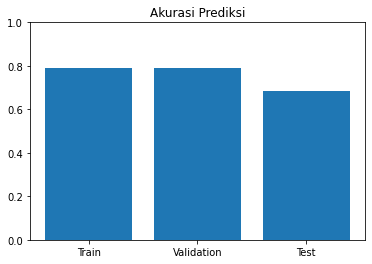

In [ ]:
import matplotlib.pyplot as  plt

x = ["Train","Validation","Test"]
y = [acc_train,acc_validation,acc_test]
plt.bar(x,y)
plt.title("Akurasi Prediksi")
plt.ylim(0,1)
plt.show()

Dari plot diatas, dapat diketahui bahwa akurasi data Train dan Validation ada disekitar 70-80% dan untuk data Test akurasi ada disekitar 60-70%

Untuk lebih jelasnya bisa dilihat dibawah

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_train,predict_train))

              precision    recall  f1-score   support

           0       0.91      0.64      0.76    196305
           1       0.73      0.94      0.82    196529

    accuracy                           0.79    392834
   macro avg       0.82      0.79      0.79    392834
weighted avg       0.82      0.79      0.79    392834



In [ ]:
print(classification_report(label_validation,predict_validation))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75     49216
           1       0.72      0.94      0.82     48992

    accuracy                           0.79     98208
   macro avg       0.82      0.79      0.79     98208
weighted avg       0.82      0.79      0.79     98208



In [ ]:
print(classification_report(label_test,predict_test))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     41778
           1       0.27      0.93      0.42      5861

    accuracy                           0.69     47639
   macro avg       0.63      0.79      0.60     47639
weighted avg       0.90      0.69      0.74     47639



# **Eksperimen**

Pada eksperimen kali ini, kita akan menguji apakah dengan mengatur parameter min_samples pada Decision Tree dapat meningkatkan akurasi atau tidak. Parameter min_samples digunakan untuk menentukan jumlah minimum samples dari setiap cabang.

Pada Decision Tree yang kita buat, parameter default min_samples adalah None, jika min_samples diatur default, maka min_samples akan diatur sebanyak jumlah label/target yang unik ditambah 1

Kali ini kita akan melakukan eksperimen dengan mengatur min_samples sebesar 1%, 3%, dan 5% dari total jumlah data

**min_samples Default**

Pada [section ini](#cell-train-dataset), kita telah melakukan train dengan min_samples diatur sebagai default sehingga untuk menghemat waktu, kita tidak perlu melakukan train kembali.

In [ ]:
# min_samples default

tree_default = tree

In [ ]:
predict_train_default = predict(tree_default,train)
predict_validation_default = predict(tree_default,validation)
predict_test_default = predict(tree_default,test)

**min_samples 1%**

In [ ]:
%%time
# min_samples 1%

tree_1 = decision_tree(train,label_train,min_samples=0.01)

CPU times: user 27min 19s, sys: 32.5 s, total: 27min 51s
Wall time: 27min 46s


In [ ]:
predict_train_1 = predict(tree_1,train)
predict_validation_1 = predict(tree_1,validation)
predict_test_1 = predict(tree_1,test)

**min_samples 3%**

In [ ]:
%%time
# min_samples 3%

tree_3 = decision_tree(train,label_train,min_samples=0.03)

CPU times: user 26min 38s, sys: 24.2 s, total: 27min 3s
Wall time: 27min


In [ ]:
predict_train_3 = predict(tree_3,train)
predict_validation_3 = predict(tree_3,validation)
predict_test_3 = predict(tree_3,test)

**min_samples 5%**

In [ ]:
%%time
# min_samples 5%

tree_5 = decision_tree(train,label_train,min_samples=0.05)

CPU times: user 26min 23s, sys: 24.5 s, total: 26min 48s
Wall time: 26min 42s


In [ ]:
predict_train_5 = predict(tree_5,train)
predict_validation_5 = predict(tree_5,validation)
predict_test_5 = predict(tree_5,test)

**Mendapatkan Akurasi Eksperimen**

In [ ]:
x = ["Default","1%","3%","5%"]
y_predict_train = [get_accuracy(label_train,predict_train_default),
                   get_accuracy(label_train,predict_train_1),
                   get_accuracy(label_train,predict_train_3),
                   get_accuracy(label_train,predict_train_5)]

y_predict_validation = [get_accuracy(label_validation,predict_validation_default),
                        get_accuracy(label_validation,predict_validation_1),
                        get_accuracy(label_validation,predict_validation_3),
                        get_accuracy(label_validation,predict_validation_5)]

y_predict_test = [get_accuracy(label_test,predict_test_default),
                  get_accuracy(label_test,predict_test_1),
                  get_accuracy(label_test,predict_test_3),
                  get_accuracy(label_test,predict_test_5)]


**Visualisasi Eksperimen**

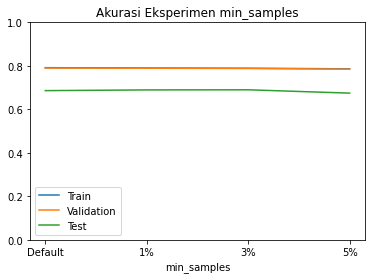

In [ ]:
plt.plot(x,y_predict_train,label="Train")
plt.plot(x,y_predict_validation,label="Validation")
plt.plot(x,y_predict_test,label="Test")
plt.xlabel("min_samples")
plt.ylim(0,1)
plt.title("Akurasi Eksperimen min_samples")
plt.legend()
plt.show()

In [ ]:
print("Highest Accuracy\n")

print(f"Train: min_samples = {x[np.argmax(y_predict_train)]}")
print(f"Validation: min_samples = {x[np.argmax(y_predict_validation)]}")
print(f"Test: min_samples = {x[np.argmax(y_predict_test)]}")


Highest Accuracy

Train: min_samples = Default
Validation: min_samples = Default
Test: min_samples = 3%


In [ ]:
column = x
data = np.array([y_predict_train,y_predict_validation,y_predict_test])*100
index = ["Train","Validation","Test"]

df_eksperimen = pd.DataFrame(data=data, columns=column, index=index )
df_eksperimen

,Default,1%,3%,5%
Train,79.196811,79.063167,78.943523,78.665798
Validation,79.022076,78.950798,78.827590,78.528226
Test,68.645438,68.972900,69.031676,67.495120


In [ ]:
percent_3 = data[:,2]
default = data[:,0]

percent_3 - default

array([-0.25328765, -0.19448517,  0.38623817])

# **Kesimpulan**

Dataset yang disediakan dapat diklasifikasikan dengan model Decision Tree dengan akurasi sebesar 79% pada data train, 79% pada data validation, dan 68% pada data test.

Pada eksperimen yang dilakukan, didapat bahwa pada dataset yang kita miliki tidak banyak terjadi peningkatan akurasi, bahkan terjadi penurunan pada beberapa data saat mengatur min_samples

Meskipun begitu, kita dapat meningkatkan akurasi sebesar 0.3% pada data test dengan mengatur min_samples sebesar 3%, namun hal itu dapat menurunkan akurasi sebesar 0.2% pada data train dan 0.1% pada data validation